# Toy gaussian example auto example

final_mean_2d tensor([[1.5500e+01, 1.5500e+01, 8.0001e-03]], grad_fn=<CatBackward0>)


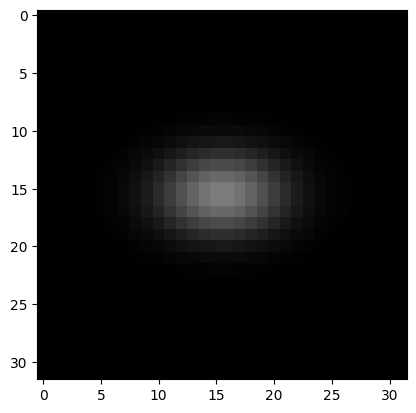

  0%|          | 0/2 [00:00<?, ?it/s]

final_mean_2d tensor([[1.5500e+01, 1.5500e+01, 8.0001e-03]], grad_fn=<CatBackward0>)


 50%|█████     | 1/2 [00:03<00:03,  3.83s/it, loss=0.00578]

loss tensor(0.0058, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d tensor([[-2.1531e-06, -7.6446e-08, -3.7710e-03]])
R grad tensor([[-0.0003,  0.0019,  0.0044,  0.0002]])
S grad tensor([[-0.0917, -0.0394,  0.0000]])
Color grad tensor([-0.0025, -0.0025, -0.0025])
Opacity grad tensor([-0.0023])
final_mean_2d tensor([[1.6103e+01, 1.6035e+01, 8.0000e-03]], grad_fn=<CatBackward0>)


100%|██████████| 2/2 [00:07<00:00,  3.76s/it, loss=0.00596]

loss tensor(0.0060, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_3d tensor([[ 4.6681e+00,  3.3290e+00, -3.6311e-03]])
R grad tensor([[-0.0003,  0.0018,  0.0043,  0.0002]])
S grad tensor([[-0.0906, -0.0389,  0.0000]])
Color grad tensor([-0.0025, -0.0025, -0.0025])
Opacity grad tensor([-0.0022])
GT image


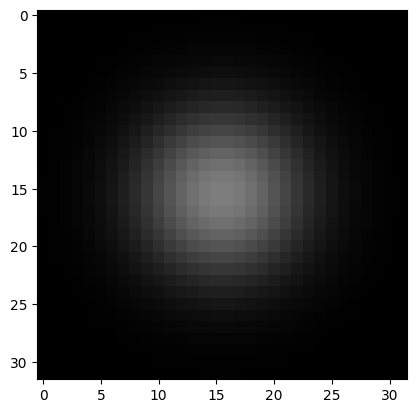

Final image


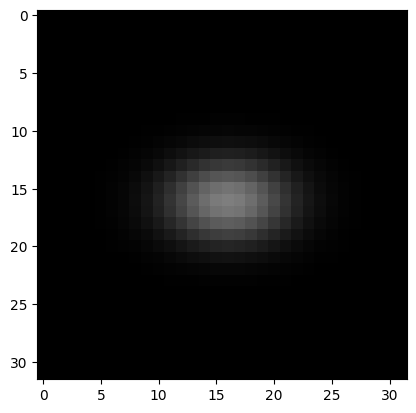

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
from PIL import Image

from splat.test.create_image_auto import Camera, Gaussian, create_image_full_auto

torch.autograd.set_detect_anomaly(True)

point_3d = torch.tensor([[0.1, 0.1, -4]], dtype=torch.float32).requires_grad_(True)
r = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float32).requires_grad_(True)
s = torch.tensor([[.1, .15, .2]], dtype=torch.float32).requires_grad_(True)
color = torch.tensor([0.8, 0.8, 0.8], dtype=torch.float32).requires_grad_(True)
opacity = torch.tensor([0.5], dtype=torch.float32).requires_grad_(True)

gaussian = Gaussian(
    mean_3d=point_3d, 
    r=r, 
    s=s, 
    color=color, 
    opacity=opacity
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

output_auto = create_image_full_auto(camera, gaussian, height, width)
plt.imshow(output_auto.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r, s, point_3d, color, opacity], lr=0.00005)

pbar = tqdm.tqdm(range(2))
for i in pbar:
    optimizer.zero_grad()
    output_auto = create_image_full_auto(camera, gaussian, height, width)
    loss = (output_auto - gt_image).pow(2).mean()
    loss.backward()
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    print("loss", loss)
    print("point_3d", point_3d.grad)
    print("R grad", r.grad)
    print("S grad", s.grad)
    print("Color grad", color.grad)
    print("Opacity grad", opacity.grad)
    # print("\n\n")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_auto.detach().numpy())
plt.show()

# Toy Gaussian custom grad example

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from splat.test.create_image_custom import (
    Camera,
    Gaussian,
)
from splat.test.create_image_custom import create_image_full_custom
import tqdm
torch.autograd.set_detect_anomaly(True)

point_2d = torch.tensor([[14, 14, 1]], dtype=torch.float32).requires_grad_(True)
r = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float32).requires_grad_(True)
s = torch.tensor([[.1, .15, .2]], dtype=torch.float32).requires_grad_(True)
color = torch.tensor([0.8, 0.8, 0.8], dtype=torch.float32).requires_grad_(True)
opacity = torch.tensor([0.5], dtype=torch.float32).requires_grad_(True)

gaussian = Gaussian(
    mean_2d=point_2d, 
    r=r, 
    s=s, 
    color=color, 
    opacity=opacity
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

output_custom = create_image_full_custom(camera, gaussian, height, width)
plt.imshow(output_custom.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r, s, point_2d, color, opacity], lr=0.005)

pbar = tqdm.tqdm(range(20))
for i in pbar:
    optimizer.zero_grad()
    output_custom = create_image_full_custom(camera, gaussian, height, width)
    loss = (output_custom - gt_image).pow(2).mean()
    loss.backward()
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    # print("loss", loss)
    # print("point_2d", point_2d.grad)
    # print("R grad", r.grad)
    # print("S grad", s.grad)
    # print("Color grad", color.grad)
    # print("Opacity grad", opacity.grad)
    print("\n\n")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_auto.detach().numpy())
plt.show()

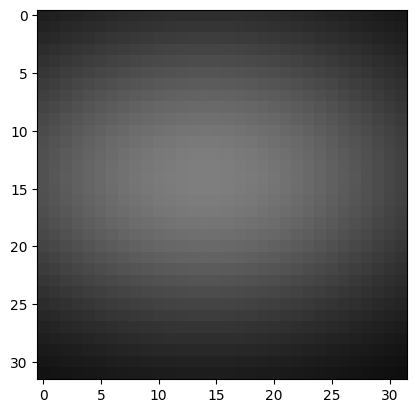

  5%|▌         | 1/20 [00:01<00:22,  1.18s/it, loss=0.0512]

loss tensor(0.0512, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0004,  0.0002, -0.1147]])
R grad tensor([[ 0.0026, -0.0148, -0.0326, -0.0018]])
S grad tensor([[0.6807, 0.3112, 0.0000]])
Color grad tensor([0.0532, 0.0532, 0.0532])
Opacity grad tensor([0.0482])





 10%|█         | 2/20 [00:02<00:20,  1.13s/it, loss=0.0445]

loss tensor(0.0445, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0005,  0.0001, -0.1067]])
R grad tensor([[ 0.0036, -0.0179, -0.0358, -0.0106]])
S grad tensor([[0.6616, 0.3060, 0.0000]])
Color grad tensor([0.0472, 0.0472, 0.0472])
Opacity grad tensor([0.0426])





 15%|█▌        | 3/20 [00:03<00:19,  1.13s/it, loss=0.038] 

loss tensor(0.0380, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-6.3872e-04,  5.3116e-05, -9.7705e-02]])
R grad tensor([[ 0.0047, -0.0205, -0.0377, -0.0170]])
S grad tensor([[0.6325, 0.2982, 0.0000]])
Color grad tensor([0.0413, 0.0413, 0.0413])
Opacity grad tensor([0.0372])





 20%|██        | 4/20 [00:04<00:18,  1.15s/it, loss=0.0319]

loss tensor(0.0319, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-7.6974e-04, -1.8165e-05, -8.7883e-02]])
R grad tensor([[ 0.0059, -0.0226, -0.0382, -0.0226]])
S grad tensor([[0.5923, 0.2877, 0.0000]])
Color grad tensor([0.0355, 0.0355, 0.0355])
Opacity grad tensor([0.0319])





 25%|██▌       | 5/20 [00:05<00:16,  1.13s/it, loss=0.0262]

loss tensor(0.0262, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-8.8915e-04, -9.1567e-05, -7.7408e-02]])
R grad tensor([[ 0.0070, -0.0241, -0.0371, -0.0269]])
S grad tensor([[0.5408, 0.2742, 0.0000]])
Color grad tensor([0.0300, 0.0300, 0.0300])
Opacity grad tensor([0.0268])





 30%|███       | 6/20 [00:06<00:15,  1.12s/it, loss=0.021] 

loss tensor(0.0210, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0010, -0.0002, -0.0665]])
R grad tensor([[ 0.0079, -0.0249, -0.0344, -0.0296]])
S grad tensor([[0.4784, 0.2577, 0.0000]])
Color grad tensor([0.0248, 0.0248, 0.0248])
Opacity grad tensor([0.0221])





 35%|███▌      | 7/20 [00:07<00:14,  1.11s/it, loss=0.0164]

loss tensor(0.0164, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0011, -0.0002, -0.0556]])
R grad tensor([[ 0.0084, -0.0250, -0.0302, -0.0307]])
S grad tensor([[0.4066, 0.2384, 0.0000]])
Color grad tensor([0.0200, 0.0200, 0.0200])
Opacity grad tensor([0.0178])





 40%|████      | 8/20 [00:09<00:13,  1.13s/it, loss=0.0126]

loss tensor(0.0126, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0011, -0.0003, -0.0449]])
R grad tensor([[ 0.0085, -0.0244, -0.0249, -0.0299]])
S grad tensor([[0.3276, 0.2163, 0.0000]])
Color grad tensor([0.0156, 0.0156, 0.0156])
Opacity grad tensor([0.0139])





 45%|████▌     | 9/20 [00:10<00:12,  1.12s/it, loss=0.00942]

loss tensor(0.0094, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0012, -0.0004, -0.0347]])
R grad tensor([[ 0.0082, -0.0231, -0.0186, -0.0275]])
S grad tensor([[0.2440, 0.1921, 0.0000]])
Color grad tensor([0.0118, 0.0118, 0.0118])
Opacity grad tensor([0.0104])





 50%|█████     | 10/20 [00:11<00:11,  1.11s/it, loss=0.00702]

loss tensor(0.0070, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0012, -0.0004, -0.0254]])
R grad tensor([[ 0.0073, -0.0212, -0.0119, -0.0235]])
S grad tensor([[0.1591, 0.1662, 0.0000]])
Color grad tensor([0.0085, 0.0085, 0.0085])
Opacity grad tensor([0.0075])





 55%|█████▌    | 11/20 [00:12<00:09,  1.10s/it, loss=0.00534]

loss tensor(0.0053, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0013, -0.0005, -0.0173]])
R grad tensor([[ 0.0059, -0.0188, -0.0053, -0.0184]])
S grad tensor([[0.0763, 0.1393, 0.0000]])
Color grad tensor([0.0057, 0.0057, 0.0057])
Opacity grad tensor([0.0050])





 60%|██████    | 12/20 [00:13<00:08,  1.12s/it, loss=0.00431]

loss tensor(0.0043, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0012, -0.0005, -0.0103]])
R grad tensor([[ 0.0041, -0.0160,  0.0009, -0.0124]])
S grad tensor([[-0.0013,  0.1126,  0.0000]])
Color grad tensor([0.0035, 0.0035, 0.0035])
Opacity grad tensor([0.0031])





 65%|██████▌   | 13/20 [00:14<00:07,  1.12s/it, loss=0.00381]

loss tensor(0.0038, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0012, -0.0005, -0.0046]])
R grad tensor([[ 0.0020, -0.0131,  0.0062, -0.0060]])
S grad tensor([[-0.0706,  0.0867,  0.0000]])
Color grad tensor([0.0018, 0.0018, 0.0018])
Opacity grad tensor([0.0016])





 70%|███████   | 14/20 [00:15<00:06,  1.12s/it, loss=0.00373]

loss tensor(0.0037, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-1.1992e-03, -5.2755e-04, -8.4452e-05]])
R grad tensor([[-0.0002, -0.0101,  0.0105,  0.0003]])
S grad tensor([[-0.1293,  0.0625,  0.0000]])
Color grad tensor([0.0005, 0.0005, 0.0005])
Opacity grad tensor([0.0004])





 75%|███████▌  | 15/20 [00:16<00:05,  1.12s/it, loss=0.00392]

loss tensor(0.0039, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0012, -0.0005,  0.0033]])
R grad tensor([[-0.0024, -0.0073,  0.0137,  0.0062]])
S grad tensor([[-0.1761,  0.0407,  0.0000]])
Color grad tensor([-0.0004, -0.0004, -0.0004])
Opacity grad tensor([-0.0004])





 80%|████████  | 16/20 [00:18<00:04,  1.15s/it, loss=0.00425]

loss tensor(0.0042, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0011, -0.0005,  0.0058]])
R grad tensor([[-0.0043, -0.0047,  0.0158,  0.0113]])
S grad tensor([[-0.2110,  0.0214,  0.0000]])
Color grad tensor([-0.0011, -0.0011, -0.0011])
Opacity grad tensor([-0.0009])





 85%|████████▌ | 17/20 [00:19<00:03,  1.14s/it, loss=0.00461]

loss tensor(0.0046, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0011, -0.0005,  0.0076]])
R grad tensor([[-0.0060, -0.0023,  0.0170,  0.0154]])
S grad tensor([[-0.2350,  0.0047,  0.0000]])
Color grad tensor([-0.0015, -0.0015, -0.0015])
Opacity grad tensor([-0.0013])





 90%|█████████ | 18/20 [00:20<00:02,  1.13s/it, loss=0.00493]

loss tensor(0.0049, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0010, -0.0006,  0.0088]])
R grad tensor([[-0.0073, -0.0002,  0.0176,  0.0186]])
S grad tensor([[-0.2497, -0.0096,  0.0000]])
Color grad tensor([-0.0019, -0.0019, -0.0019])
Opacity grad tensor([-0.0016])





 95%|█████████▌| 19/20 [00:21<00:01,  1.14s/it, loss=0.00516]

loss tensor(0.0052, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0010, -0.0006,  0.0097]])
R grad tensor([[-0.0083,  0.0017,  0.0177,  0.0209]])
S grad tensor([[-0.2569, -0.0220,  0.0000]])
Color grad tensor([-0.0021, -0.0021, -0.0021])
Opacity grad tensor([-0.0018])





100%|██████████| 20/20 [00:22<00:00,  1.13s/it, loss=0.00527]

loss tensor(0.0053, dtype=torch.float64, grad_fn=<MeanBackward0>)
point_2d tensor([[-0.0009, -0.0006,  0.0104]])
R grad tensor([[-0.0089,  0.0033,  0.0175,  0.0222]])
S grad tensor([[-0.2582, -0.0326,  0.0000]])
Color grad tensor([-0.0022, -0.0022, -0.0022])
Opacity grad tensor([-0.0019])



GT image


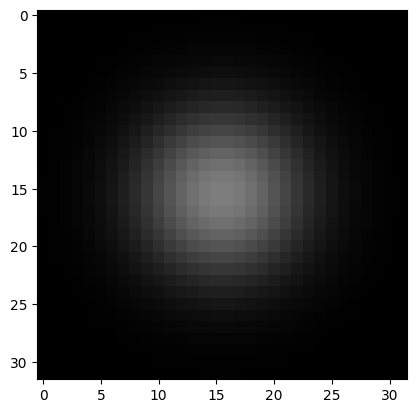

Final image


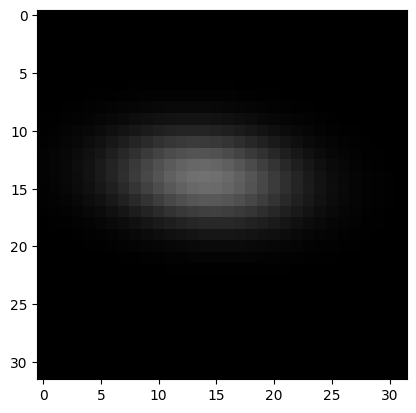

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

from splat.test.create_image_custom import (
    Camera,
    Gaussian,
)
from splat.test.create_image_custom import create_image_full_custom
import tqdm
torch.autograd.set_detect_anomaly(True)

point_2d = torch.tensor([[14, 14, 1]], dtype=torch.float32).requires_grad_(True)
r = torch.tensor([[0.5, 0.02, 0.03, 0.001]], dtype=torch.float32).requires_grad_(True)
s = torch.tensor([[.1, .15, .2]], dtype=torch.float32).requires_grad_(True)
color = torch.tensor([0.8, 0.8, 0.8], dtype=torch.float32).requires_grad_(True)
opacity = torch.tensor([0.5], dtype=torch.float32).requires_grad_(True)

gaussian = Gaussian(
    mean_2d=point_2d, 
    r=r, 
    s=s, 
    color=color, 
    opacity=opacity
)

focal_x = torch.tensor([100.0])
focal_y = torch.tensor([100.0])
width = 32
height = 32
camera_rotation = torch.tensor([1, 0, 0, 0]).unsqueeze(0)
camera_translation = torch.tensor([[-0.1, -0.1, 0.0]])

camera = Camera(
    focal_x=focal_x,
    focal_y=focal_y,
    c_x=0.0,
    c_y=0.0,
    width=width,
    height=height,
    camera_rotation=camera_rotation,
    camera_translation=camera_translation,
)
gt_image = Image.open("gt.png")
gt_image = np.array(gt_image) / 255.0
gt_image = torch.tensor(gt_image)

output_custom = create_image_full_custom(camera, gaussian, height, width)
plt.imshow(output_custom.detach().numpy())
plt.show()

optimizer = torch.optim.Adam([r, s, point_2d, color, opacity], lr=0.005)

pbar = tqdm.tqdm(range(20))
for i in pbar:
    optimizer.zero_grad()
    output_custom = create_image_full_custom(camera, gaussian, height, width)
    loss = (output_custom - gt_image).pow(2).mean()
    loss.backward()
    optimizer.step()
    pbar.set_postfix(loss=loss.item())
    # print("loss", loss)
    # print("point_2d", point_2d.grad)
    # print("R grad", r.grad)
    # print("S grad", s.grad)
    # print("Color grad", color.grad)
    # print("Opacity grad", opacity.grad)
    print("\n\n")
print("GT image")
plt.imshow(gt_image)
plt.show()
print("Final image")
plt.imshow(output_auto.detach().numpy())
plt.show()